<a href="https://colab.research.google.com/github/Mridini31/Customer-segmentation/blob/main/project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd


In [ ]:
pip install pandas openpyxl


In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Online Retail.xlsx to Online Retail.xlsx


In [ ]:
import pandas as pd

df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
print(df.head())


  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  


In [ ]:
df = df.dropna(subset=['CustomerID'])

# Confirm removal
print(f"Remaining rows after dropping null CustomerIDs: {df.shape[0]}")

# ---------------------------------
# ✅ 3. Convert date columns to datetime
# ---------------------------------
# Check the column name for dates in your dataset (likely 'InvoiceDate')
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Confirm conversion
print(df['InvoiceDate'].dtypes)

# ---------------------------------
# ✅ 4. Remove duplicate rows
# ---------------------------------
# Check number of duplicates
print(f"Duplicate rows before dropping: {df.duplicated().sum()}")

# Drop duplicates
df = df.drop_duplicates()

# Confirm removal
print(f"Duplicate rows after dropping: {df.duplicated().sum()}")

# ---------------------------------
# ✅ 5. Final check
# ---------------------------------
print(df.info())
print(df.head())

Remaining rows after dropping null CustomerIDs: 406829
datetime64[ns]
Duplicate rows before dropping: 5225
Duplicate rows after dropping: 0
<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.6+ MB
None
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053   

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: set seaborn style for aesthetics
sns.set(style="whitegrid")


In [ ]:
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')

# Drop null CustomerID
df = df.dropna(subset=['CustomerID'])

# Convert InvoiceDate to datetime
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Drop duplicates
df = df.drop_duplicates()


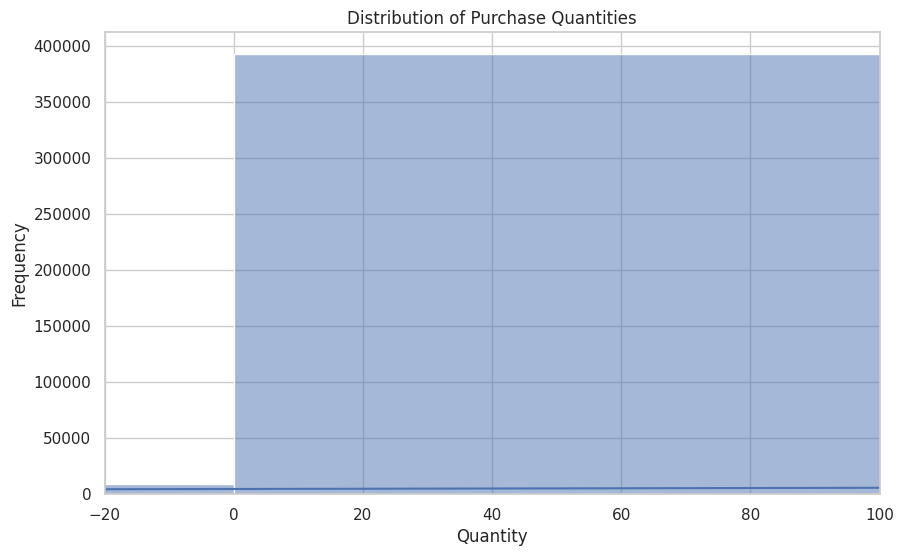

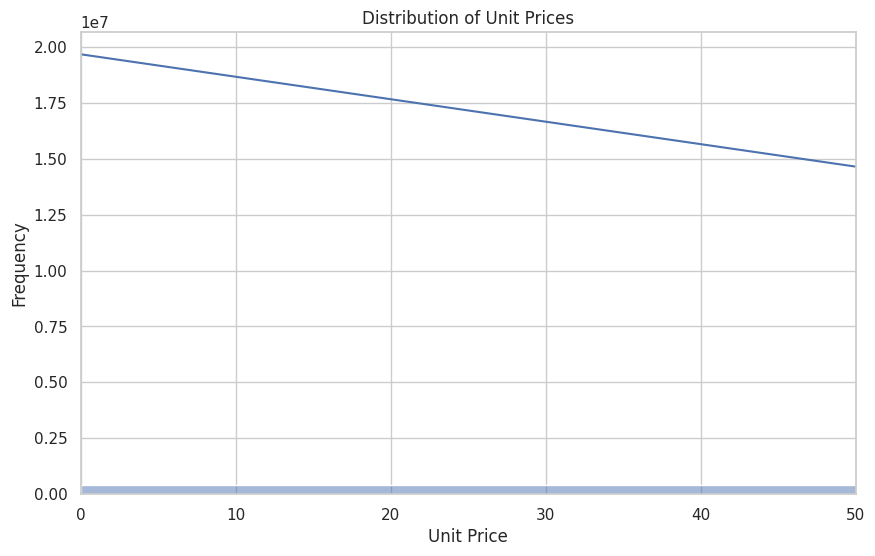

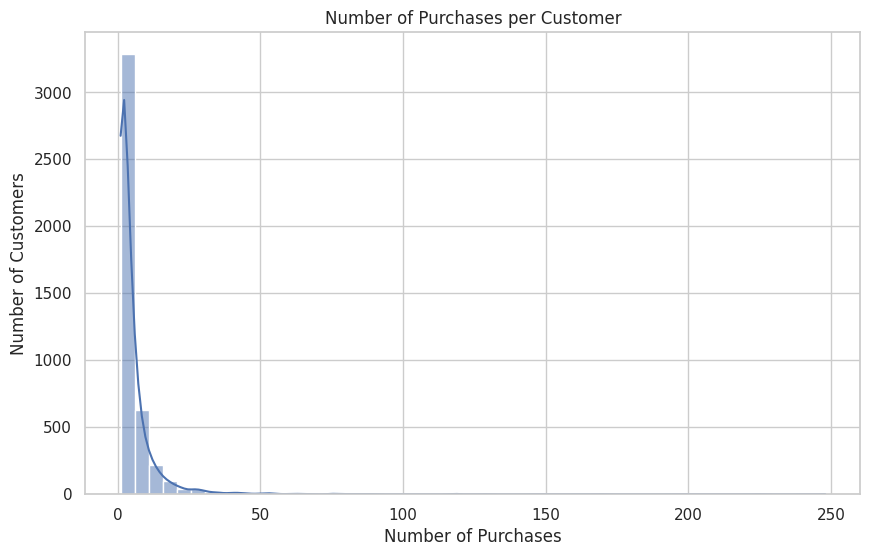

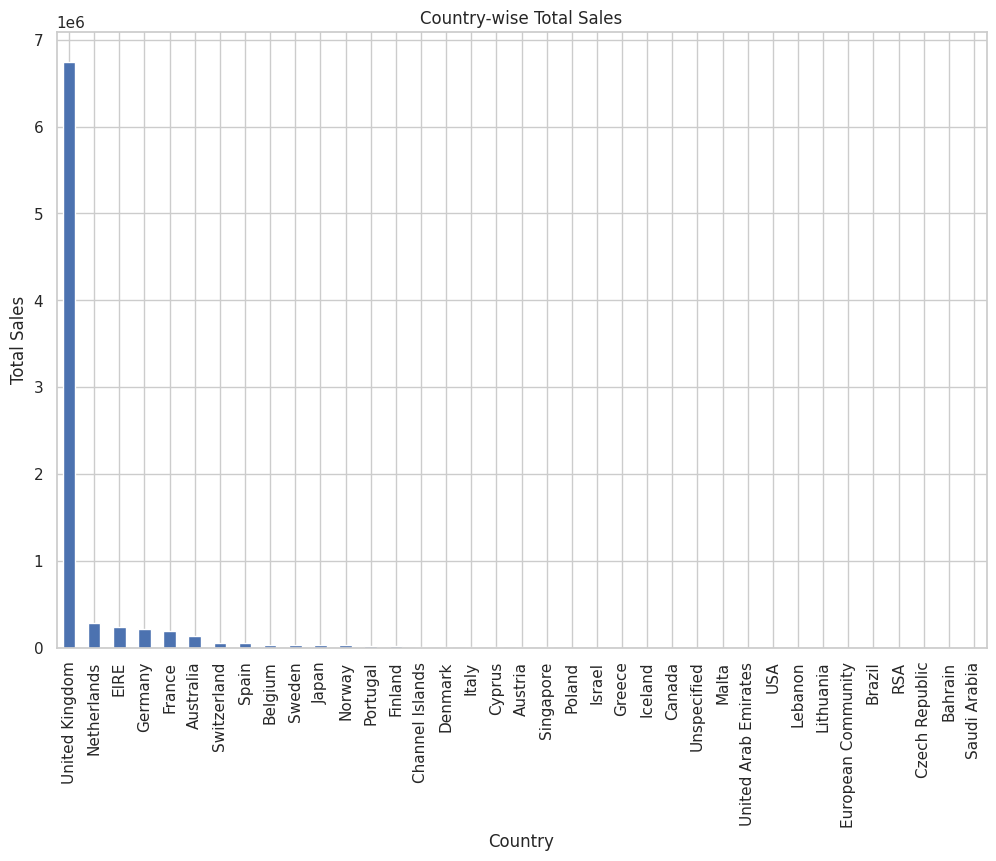

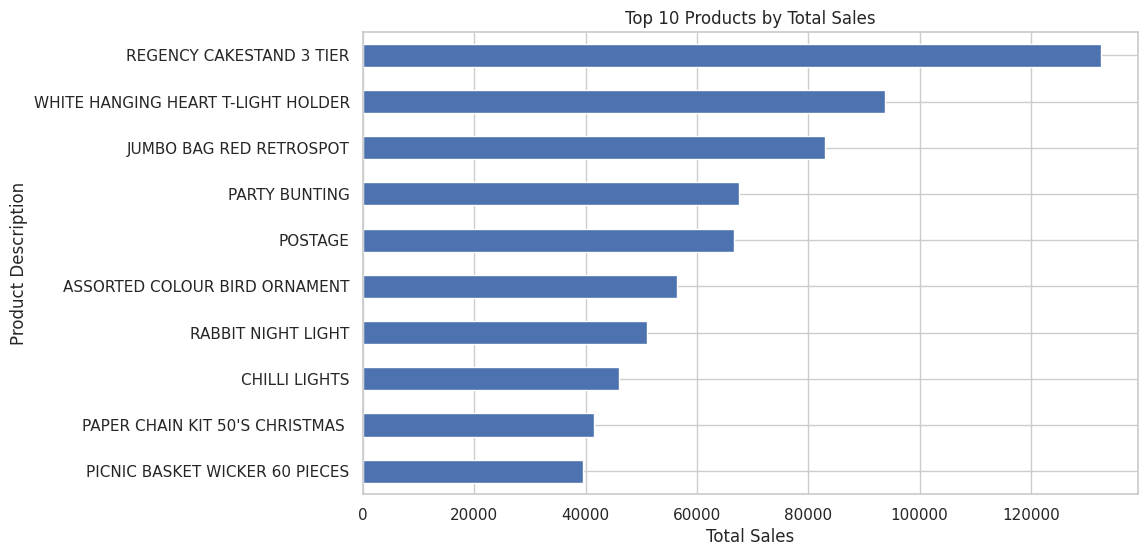

In [ ]:
plt.figure(figsize=(10,6))
sns.histplot(df['Quantity'], bins=50, kde=True)
plt.title('Distribution of Purchase Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.xlim(-20, 100)  # adjust based on your data to focus on realistic purchases
plt.show()


plt.figure(figsize=(10,6))
sns.histplot(df['UnitPrice'], bins=50, kde=True)
plt.title('Distribution of Unit Prices')
plt.xlabel('Unit Price')
plt.ylabel('Frequency')
plt.xlim(0, 50)  # adjust based on your data to focus on common price ranges
plt.show()


purchases_per_customer = df.groupby('CustomerID')['InvoiceNo'].nunique()

plt.figure(figsize=(10,6))
sns.histplot(purchases_per_customer, bins=50, kde=True)
plt.title('Number of Purchases per Customer')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Customers')
plt.show()


# Create a new column for TotalPrice
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Group by country
country_sales = df.groupby('Country')['TotalPrice'].sum().sort_values(ascending=False)

plt.figure(figsize=(12,8))
country_sales.plot(kind='bar')
plt.title('Country-wise Total Sales')
plt.ylabel('Total Sales')
plt.xlabel('Country')
plt.xticks(rotation=90)
plt.show()


top_products = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
top_products.plot(kind='barh')
plt.title('Top 10 Products by Total Sales')
plt.xlabel('Total Sales')
plt.ylabel('Product Description')
plt.gca().invert_yaxis()  # highest at top
plt.show()


In [ ]:
print(df.info())
print(df.describe())


<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalPrice   401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB
None
            Quantity                    InvoiceDate      UnitPrice  \
count  401604.000000                         401604  401604.000000   
mean       12.183273  2011-07-10 12:08:23.848567552       3.474064   
min    -80995.000000            2010-12-01 08:26

In [ ]:
import pandas as pd
import datetime as dt

# Load cleaned data
df = pd.read_excel('Online Retail.xlsx', engine='openpyxl')
df = df.dropna(subset=['CustomerID'])
df = df.drop_duplicates()
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# Create TotalPrice column
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# Remove returns (invoices starting with 'C')
df = df[~df['InvoiceNo'].astype(str).str.startswith('C')]


In [ ]:
analysis_date = df['InvoiceDate'].max() + dt.timedelta(days=1)
print(f"Analysis date: {analysis_date.date()}")


Analysis date: 2011-12-10


In [ ]:
# Group by CustomerID and calculate R, F, M
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (analysis_date - x.max()).days,   # Recency
    'InvoiceNo': 'nunique',                                    # Frequency
    'TotalPrice': 'sum'                                        # Monetary
}).reset_index()

# Rename columns
rfm.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary']

# Check results
print(rfm.head())
print(rfm.describe())


   CustomerID  Recency  Frequency  Monetary
0     12346.0      326          1  77183.60
1     12347.0        2          7   4310.00
2     12348.0       75          4   1797.24
3     12349.0       19          1   1757.55
4     12350.0      310          1    334.40
         CustomerID      Recency    Frequency       Monetary
count   4339.000000  4339.000000  4339.000000    4339.000000
mean   15299.936852    92.518322     4.271952    2048.215924
std     1721.889758   100.009747     7.705493    8984.248352
min    12346.000000     1.000000     1.000000       0.000000
25%    13812.500000    18.000000     1.000000     306.455000
50%    15299.000000    51.000000     2.000000     668.560000
75%    16778.500000   142.000000     5.000000    1660.315000
max    18287.000000   374.000000   210.000000  280206.020000


In [ ]:
rfm = rfm[rfm['Monetary'] > 0]


In [ ]:
rfm.to_csv('rfm_features.csv', index=False)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Select RFM features only
rfm_features = rfm[['Recency', 'Frequency', 'Monetary']]

# Initialize scaler
scaler = StandardScaler()

# Fit and transform
rfm_scaled = scaler.fit_transform(rfm_features)

# Convert back to dataframe for easy interpretation
rfm_scaled_df = pd.DataFrame(rfm_scaled, columns=['Recency', 'Frequency', 'Monetary'])

# Check scaled data
print(rfm_scaled_df.head())


    Recency  Frequency  Monetary
0  2.334574  -0.424733  8.363010
1 -0.905340   0.353949  0.251699
2 -0.175360  -0.035392 -0.027988
3 -0.735345  -0.424733 -0.032406
4  2.174578  -0.424733 -0.190812


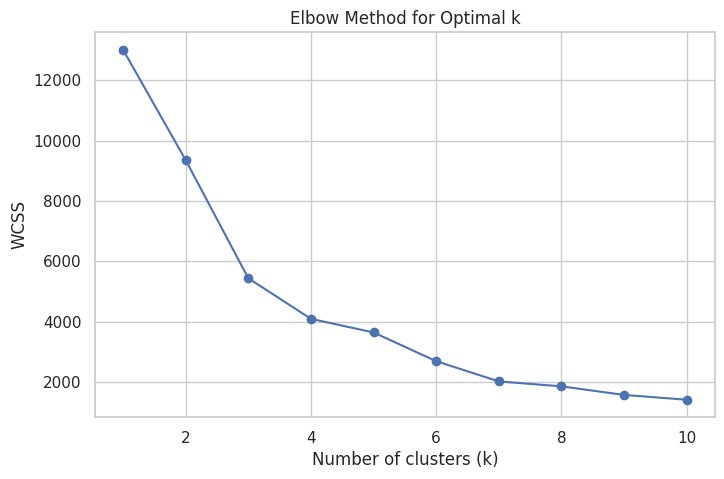

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

# Plot elbow curve
plt.figure(figsize=(8,5))
plt.plot(K, wcss, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method for Optimal k')
plt.show()


In [ ]:
from sklearn.metrics import silhouette_score

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(rfm_scaled)
    score = silhouette_score(rfm_scaled, kmeans.labels_)
    print(f"Silhouette Score for k={k}: {score:.3f}")


Silhouette Score for k=2: 0.561
Silhouette Score for k=3: 0.594
Silhouette Score for k=4: 0.616
Silhouette Score for k=5: 0.436
Silhouette Score for k=6: 0.483
Silhouette Score for k=7: 0.516
Silhouette Score for k=8: 0.517
Silhouette Score for k=9: 0.492
Silhouette Score for k=10: 0.484


In [ ]:
# Fit K-Means
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans.fit(rfm_scaled)

# Assign cluster labels to original RFM dataframe
rfm['Cluster'] = kmeans.labels_

# Check results
print(rfm.head())
rfm['Cluster'].value_counts()


   CustomerID  Recency  Frequency  Monetary  Cluster
0     12346.0      326          1  77183.60        0
1     12347.0        2          7   4310.00        3
2     12348.0       75          4   1797.24        3
3     12349.0       19          1   1757.55        3
4     12350.0      310          1    334.40        1


,count
Cluster,
3,3052
1,1062
0,211
2,13


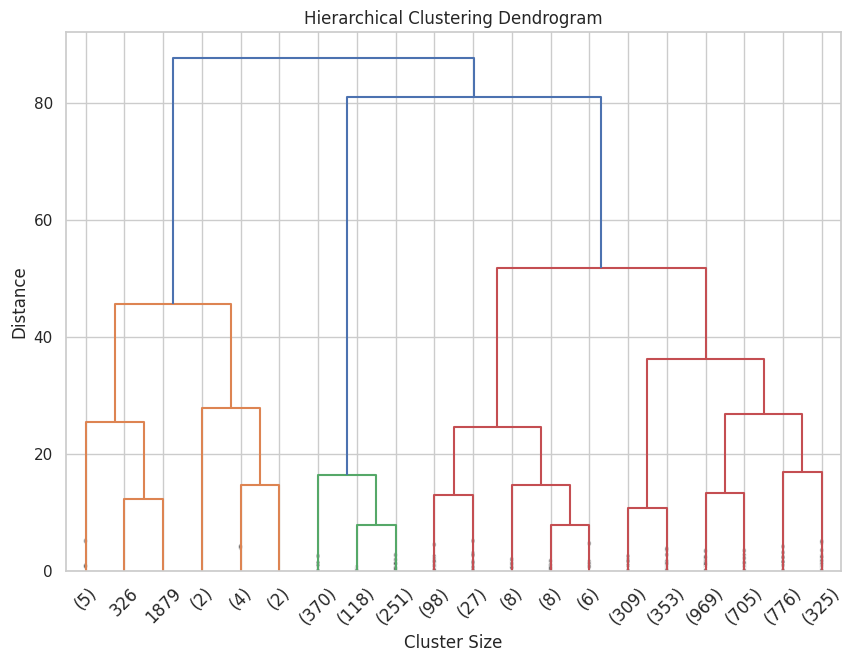

In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

# Calculate linkage matrix
linked = linkage(rfm_scaled, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='lastp', p=20, leaf_rotation=45., leaf_font_size=12., show_contracted=True)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Cluster Size')
plt.ylabel('Distance')
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering

agglo = AgglomerativeClustering(n_clusters=4, metric='euclidean', linkage='ward')
rfm['AggloCluster'] = agglo.fit_predict(rfm_scaled)

# Check results
print(rfm.head())
rfm['AggloCluster'].value_counts()


   CustomerID  Recency  Frequency  Monetary  Cluster  AggloCluster
0     12346.0      326          1  77183.60        0             3
1     12347.0        2          7   4310.00        3             1
2     12348.0       75          4   1797.24        3             1
3     12349.0       19          1   1757.55        3             1
4     12350.0      310          1    334.40        1             2


,count
AggloCluster,
1,3437
2,739
3,147
0,15


In [ ]:
# Group by K-Means clusters
cluster_profile = rfm.groupby('Cluster').agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'Monetary': 'mean',
    'CustomerID': 'count'  # Number of customers in each cluster
}).rename(columns={'CustomerID': 'NumCustomers'}).reset_index()

print(cluster_profile)


   Cluster     Recency  Frequency       Monetary  NumCustomers
0        0   15.672986  22.047393   12435.086682           211
1        1  248.564030   1.551789     476.330547          1062
2        2    7.384615  82.692308  127187.959231            13
3        3   43.920380   3.656619    1344.724473          3052


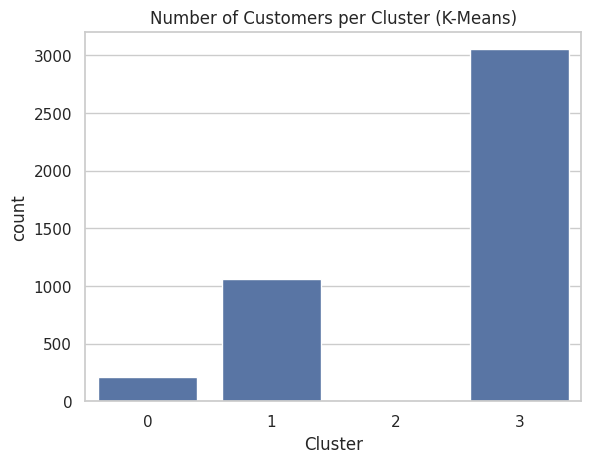

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Cluster', data=rfm)
plt.title('Number of Customers per Cluster (K-Means)')
plt.show()


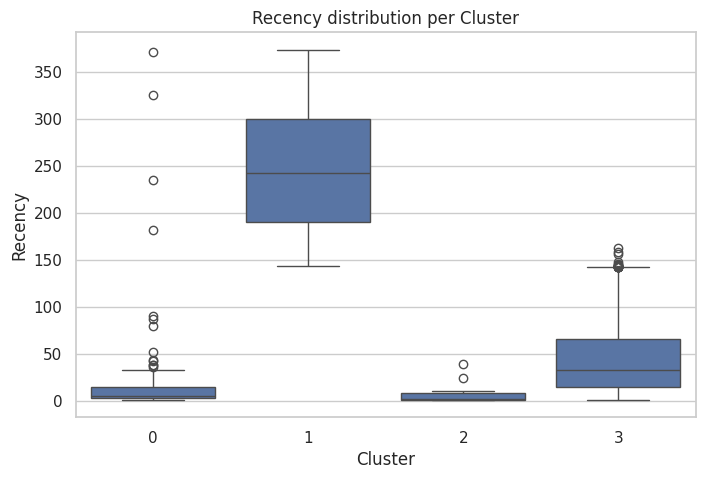

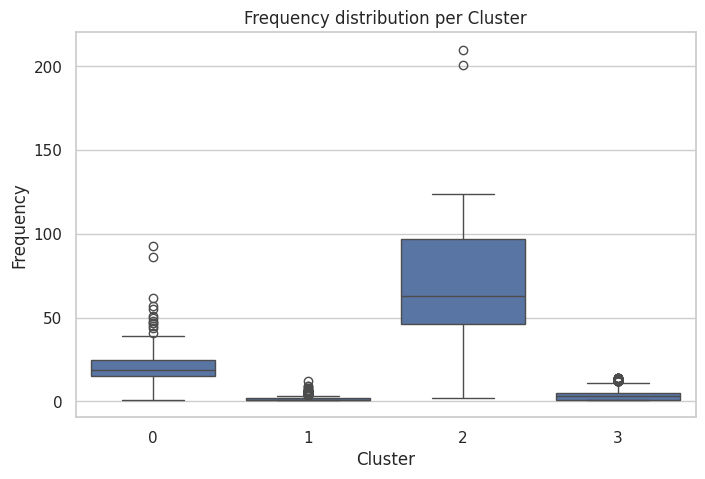

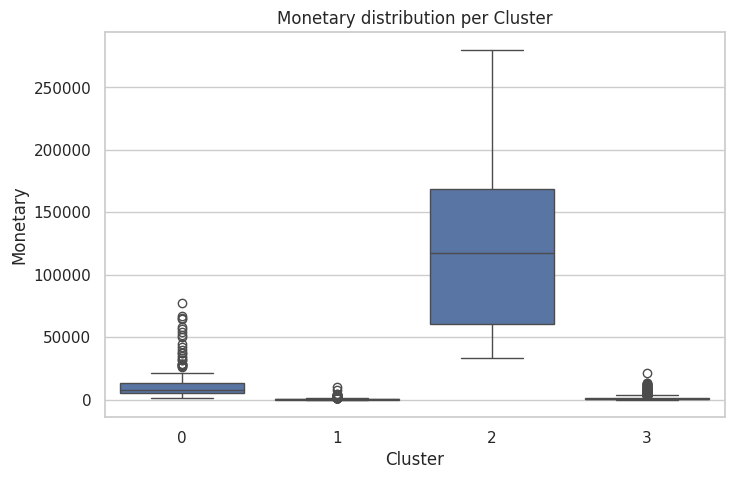

In [ ]:
for col in ['Recency', 'Frequency', 'Monetary']:
    plt.figure(figsize=(8,5))
    sns.boxplot(x='Cluster', y=col, data=rfm)
    plt.title(f'{col} distribution per Cluster')
    plt.show()


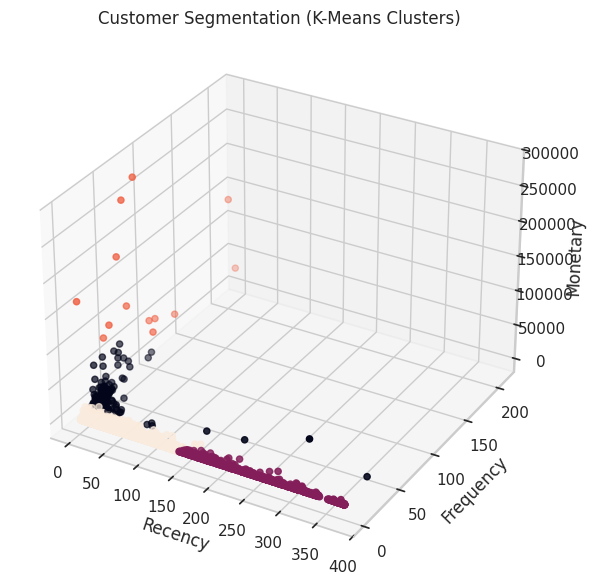

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(rfm['Recency'], rfm['Frequency'], rfm['Monetary'], c=rfm['Cluster'])
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary')
plt.title('Customer Segmentation (K-Means Clusters)')
plt.show()
